# National Health and Nutrition Examination Survey

### Data Documentation, Codebook and Frequencies

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import glob
import os
import missingno as msno

In [ ]:
def concat(dataset):
    return pd.concat([pd.read_sas(file, format='xport') for file in glob.glob(os.path.join("**",f"{dataset}_*.xpt"),recursive=True)],ignore_index=True)

metademo = {
    "SEQN": ("Respondent sequence number","N°"),
    "RIAGENDR": ("Gender","1 = Man, 2 = Woman"),
    "RIDAGEYR": ("Age", "Years")
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/CBC_E.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [20]:
cbc = concat("CBC").iloc[:,:-1]
cbc.describe()

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,...,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
count,55051.000000,49206.000000,49139.000000,49139.000000,49139.000000,4.913900e+04,4.913900e+04,49137.000000,4.913700e+04,49137.000000,...,4.913700e+04,49208.000000,49208.000000,49208.000000,49208.000000,49208.000000,49238.000000,49208.000000,49207.000000,49207.000000
mean,72111.356833,7.292529,33.831531,8.026643,54.450178,3.039622e+00,7.218767e-01,2.425594,5.690437e-01,4.034086,...,4.476260e-02,4.660816,13.725788,40.443493,86.998842,29.527727,33.922042,13.276481,259.385677,8.029545
std,17947.938454,2.981460,10.657648,2.350377,11.578763,2.406946e+00,4.945744e-01,2.059741,2.112602e-01,1.779710,...,6.316033e-02,0.475709,1.499138,4.218665,6.399655,2.525880,1.063584,1.309422,70.965997,0.952705
min,41475.000000,1.400000,2.600000,0.600000,0.800000,5.397605e-79,5.397605e-79,0.200000,5.397605e-79,0.100000,...,5.397605e-79,1.670000,6.100000,17.900000,35.400000,12.400000,25.100000,6.300000,8.000000,4.700000
25%,56371.500000,5.700000,26.500000,6.500000,47.500000,1.500000e+00,4.000000e-01,1.800000,4.000000e-01,2.800000,...,5.397605e-79,4.350000,12.700000,37.500000,83.400000,28.200000,33.300000,12.500000,211.000000,7.400000
50%,71296.000000,7.000000,32.700000,7.800000,55.500000,2.400000e+00,6.000000e-01,2.200000,5.000000e-01,3.800000,...,5.397605e-79,4.640000,13.700000,40.200000,87.500000,29.800000,33.900000,13.100000,251.000000,8.000000
75%,87854.500000,8.400000,39.900000,9.200000,62.400000,3.800000e+00,9.000000e-01,2.800000,7.000000e-01,4.900000,...,1.000000e-01,4.970000,14.800000,43.400000,91.200000,31.200000,34.600000,13.800000,299.000000,8.600000
max,102956.000000,400.000000,94.500000,66.900000,96.600000,3.660000e+01,1.970000e+01,358.800000,1.020000e+01,83.100000,...,4.700000e+00,8.300000,19.900000,59.100000,125.300000,74.500000,69.600000,37.800000,1000.000000,15.100000


<Axes: >

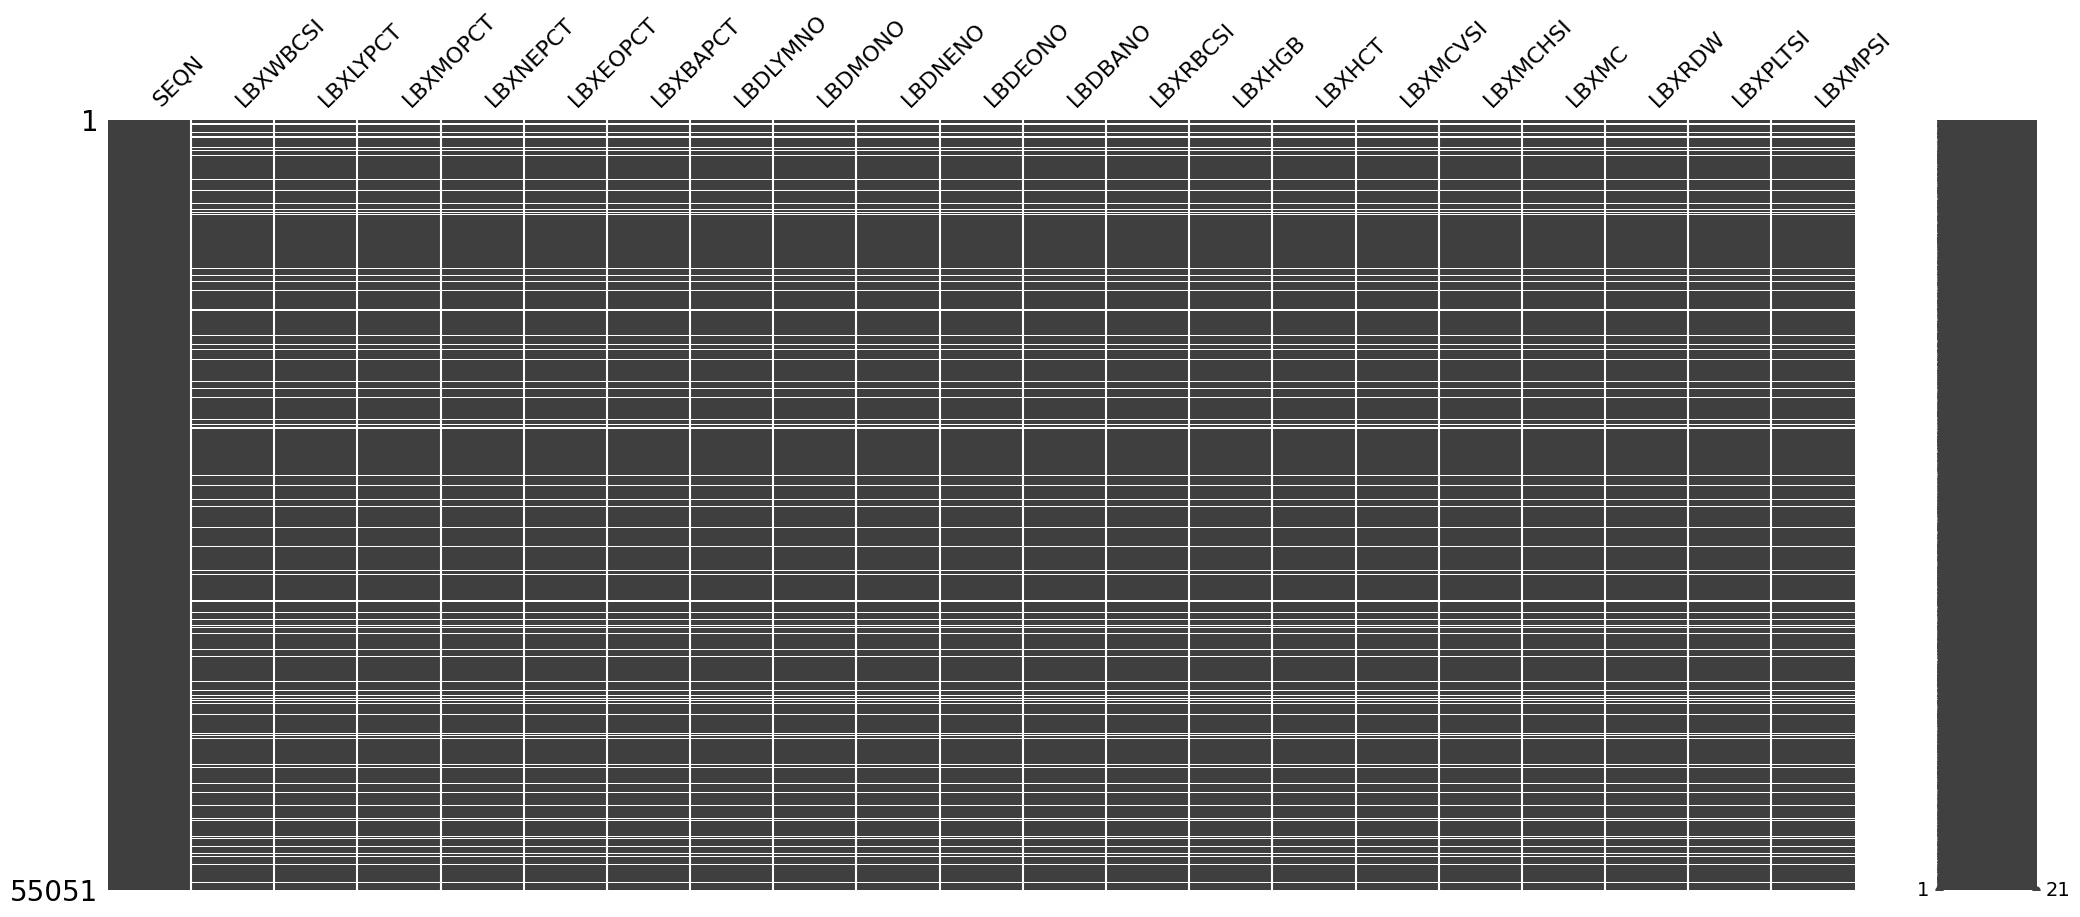

In [21]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [22]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,...,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI
811,84623.0,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.23,12.4,36.9,87.3,29.4,33.6,15.5,261.0,9.8
11657,96450.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.17,15.9,47.3,91.5,30.7,33.6,12.5,215.0,11.1
12131,96975.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.57,12.8,40.0,71.9,22.9,31.9,15.5,143.0,8.7
13542,98536.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.41,13.1,39.0,88.5,29.7,33.6,13.5,198.0,7.6
13763,98782.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.31,7.0,23.3,54.0,16.2,30.1,22.1,403.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47153,53685.0,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.06,11.9,35.3,87.1,29.1,33.5,14.4,246.0,9.6
50004,56727.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.95,7.0,22.7,57.5,17.7,30.8,22.7,393.0,7.3
53035,59989.0,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.58,10.8,32.6,87.1,30.1,34.6,13.5,279.0,6.6
54942,62042.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.55,10.5,34.3,61.8,19.0,30.7,15.2,295.0,9.5


Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

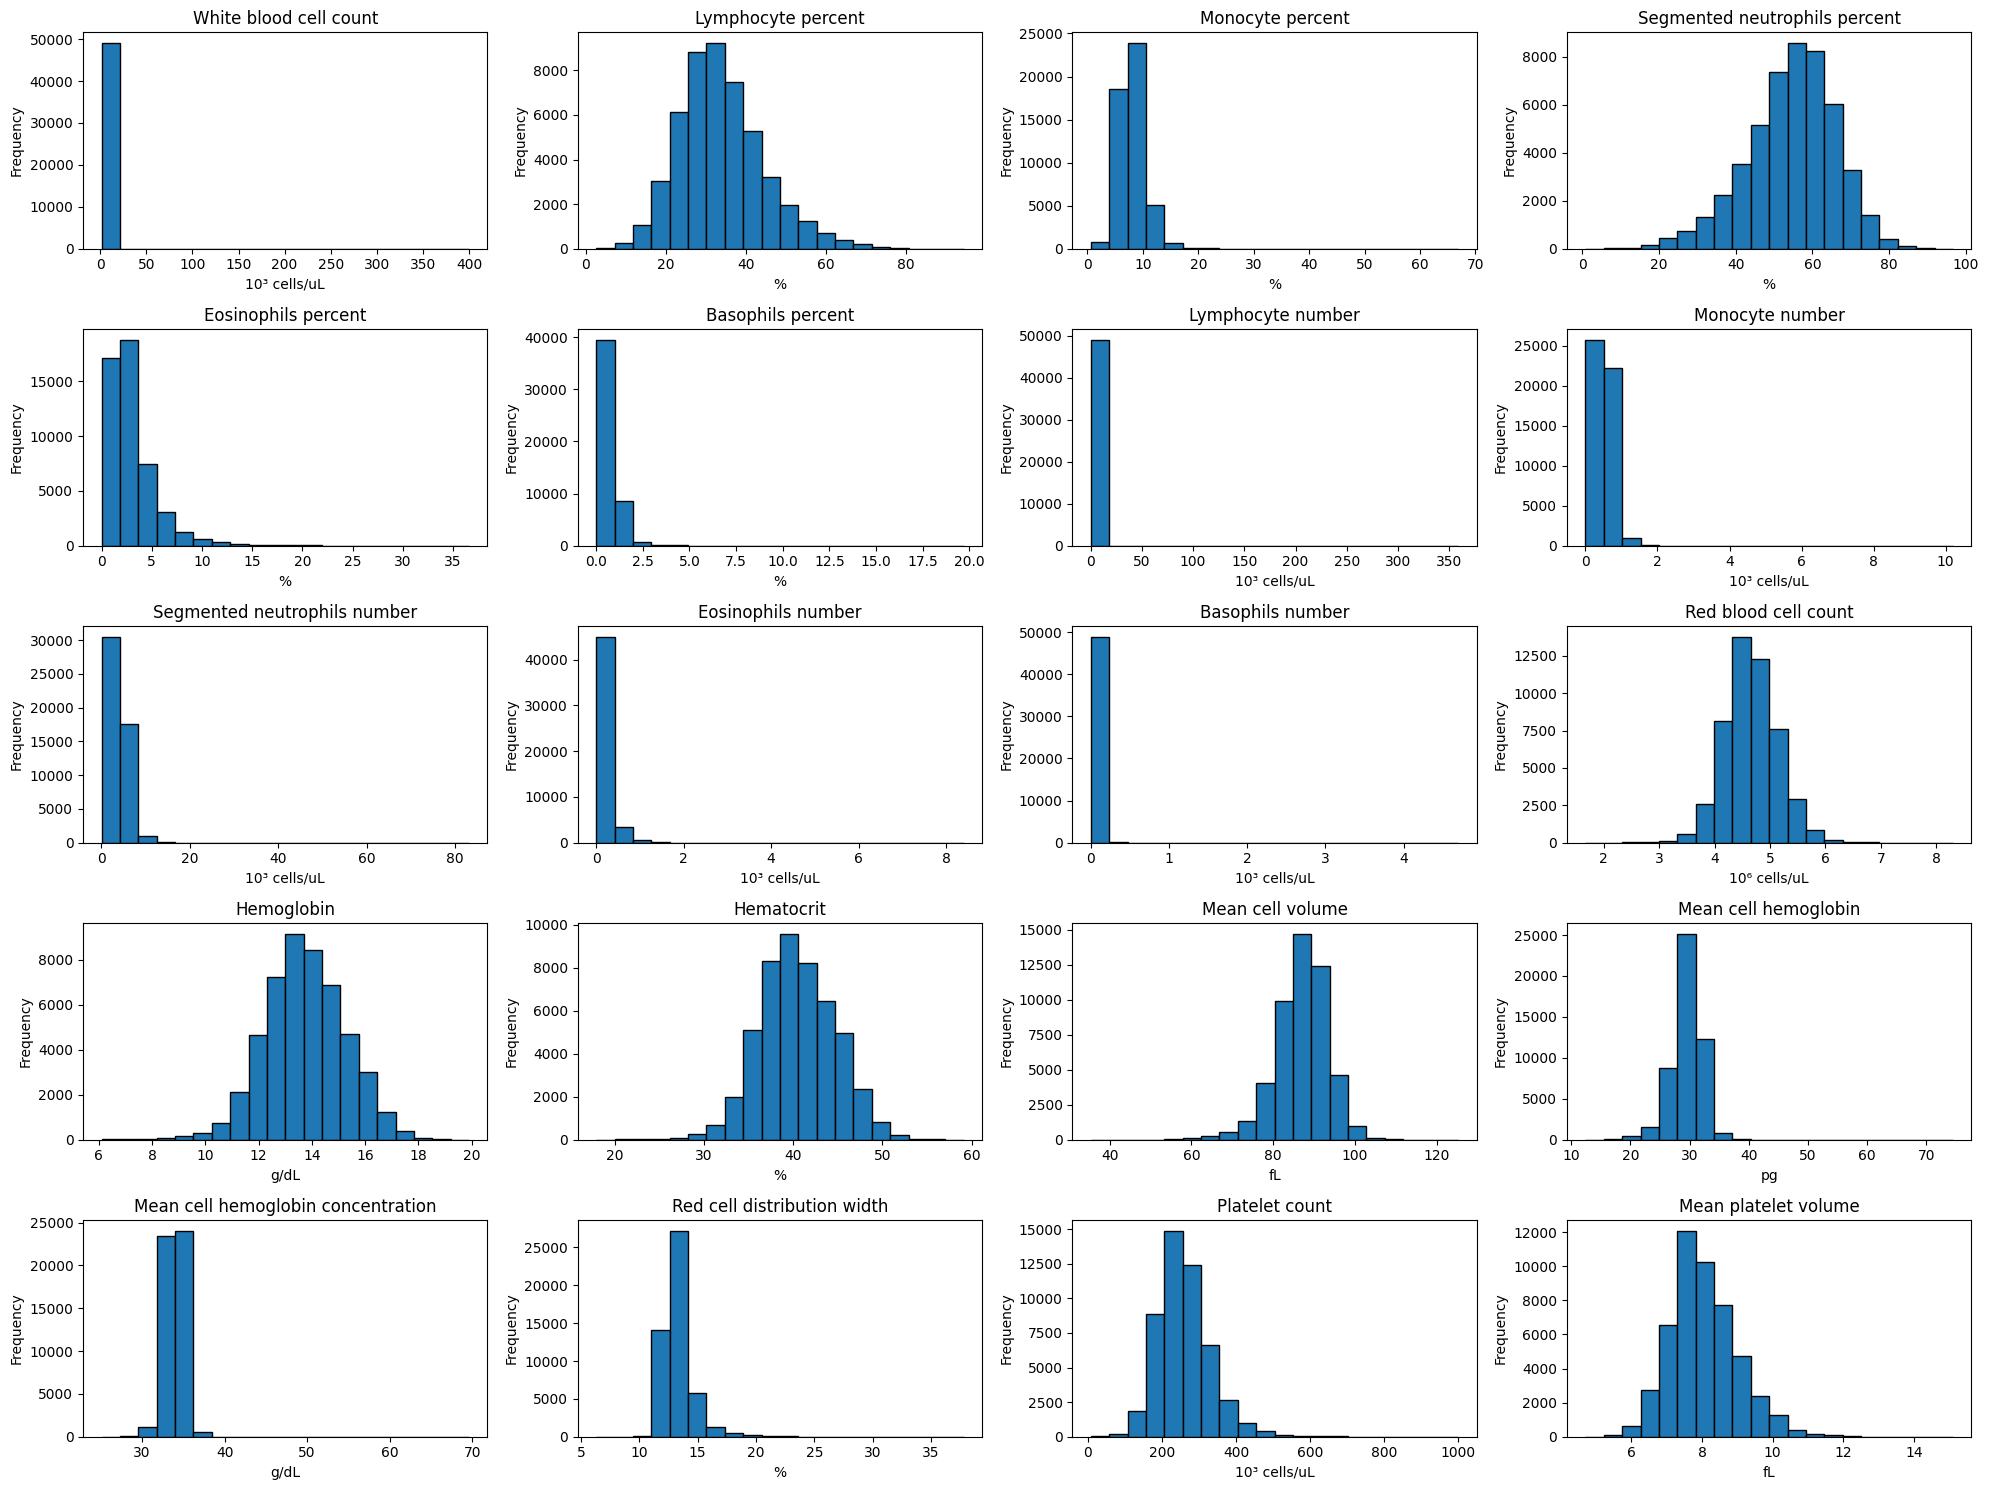

In [23]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

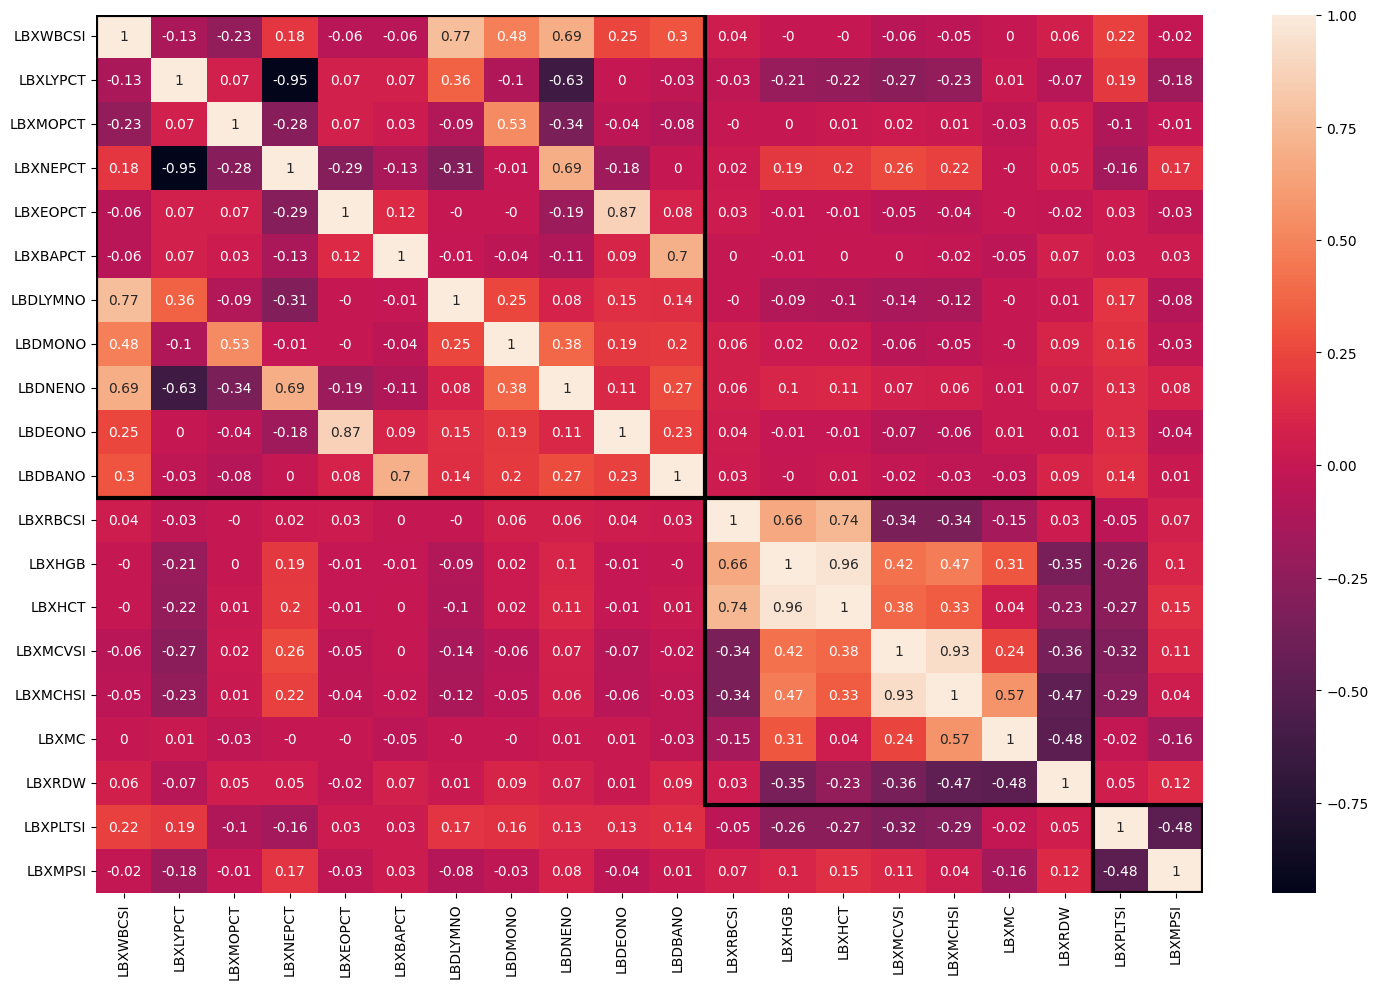

In [28]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2007-2008
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/BIOPRO_E.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [49]:
biopro = concat("BIOPRO").dropna(axis=1,thresh=30000)
biopro.describe()

,SEQN,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,...,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
count,40959.000000,37927.000000,37927.000000,37919.000000,37888.000000,37912.000000,37919.000000,37919.000000,37920.000000,37878.000000,...,37918.000000,37918.000000,3.790200e+04,3.790100e+04,37881.00000,37881.000000,37902.000000,37902.000000,37914.000000,37914.000000
mean,72191.653019,4.255312,42.553115,81.890081,25.065588,23.977712,13.299085,4.748164,25.076213,9.419922,...,3.823755,1.234682,6.518331e-01,1.114660e+01,7.17193,71.719300,143.909081,1.624740,5.383824,320.229931
std,18008.466796,0.354559,3.545594,51.202325,16.394943,19.949180,5.834829,2.083067,2.285335,0.368896,...,0.630306,0.203525,3.182106e-01,5.441256e+00,0.46387,4.638698,124.417128,1.404668,1.433289,85.251905
min,41475.000000,1.200000,12.000000,7.000000,6.000000,2.000000,1.000000,0.360000,10.000000,6.400000,...,1.000000,0.323000,5.397605e-79,5.397605e-79,3.40000,34.000000,9.000000,0.102000,0.400000,23.800000
25%,56414.500000,4.000000,40.000000,56.000000,19.000000,15.000000,10.000000,3.570000,24.000000,9.200000,...,3.400000,1.098000,4.000000e-01,6.840000e+00,6.90000,69.000000,74.000000,0.835000,4.400000,261.700000
50%,71405.000000,4.300000,43.000000,70.000000,22.000000,19.000000,12.000000,4.280000,25.000000,9.400000,...,3.800000,1.227000,6.000000e-01,1.026000e+01,7.20000,72.000000,112.000000,1.264000,5.300000,315.200000
75%,88032.500000,4.500000,45.000000,88.000000,27.000000,27.000000,16.000000,5.710000,27.000000,9.600000,...,4.200000,1.356000,8.000000e-01,1.368000e+01,7.50000,75.000000,174.000000,1.964000,6.300000,374.700000
max,102956.000000,5.600000,56.000000,907.000000,1034.000000,1363.000000,96.000000,34.270000,43.000000,14.800000,...,10.900000,3.520000,7.300000e+00,1.248300e+02,11.30000,113.000000,6057.000000,68.384000,18.000000,1070.600000


<Axes: >

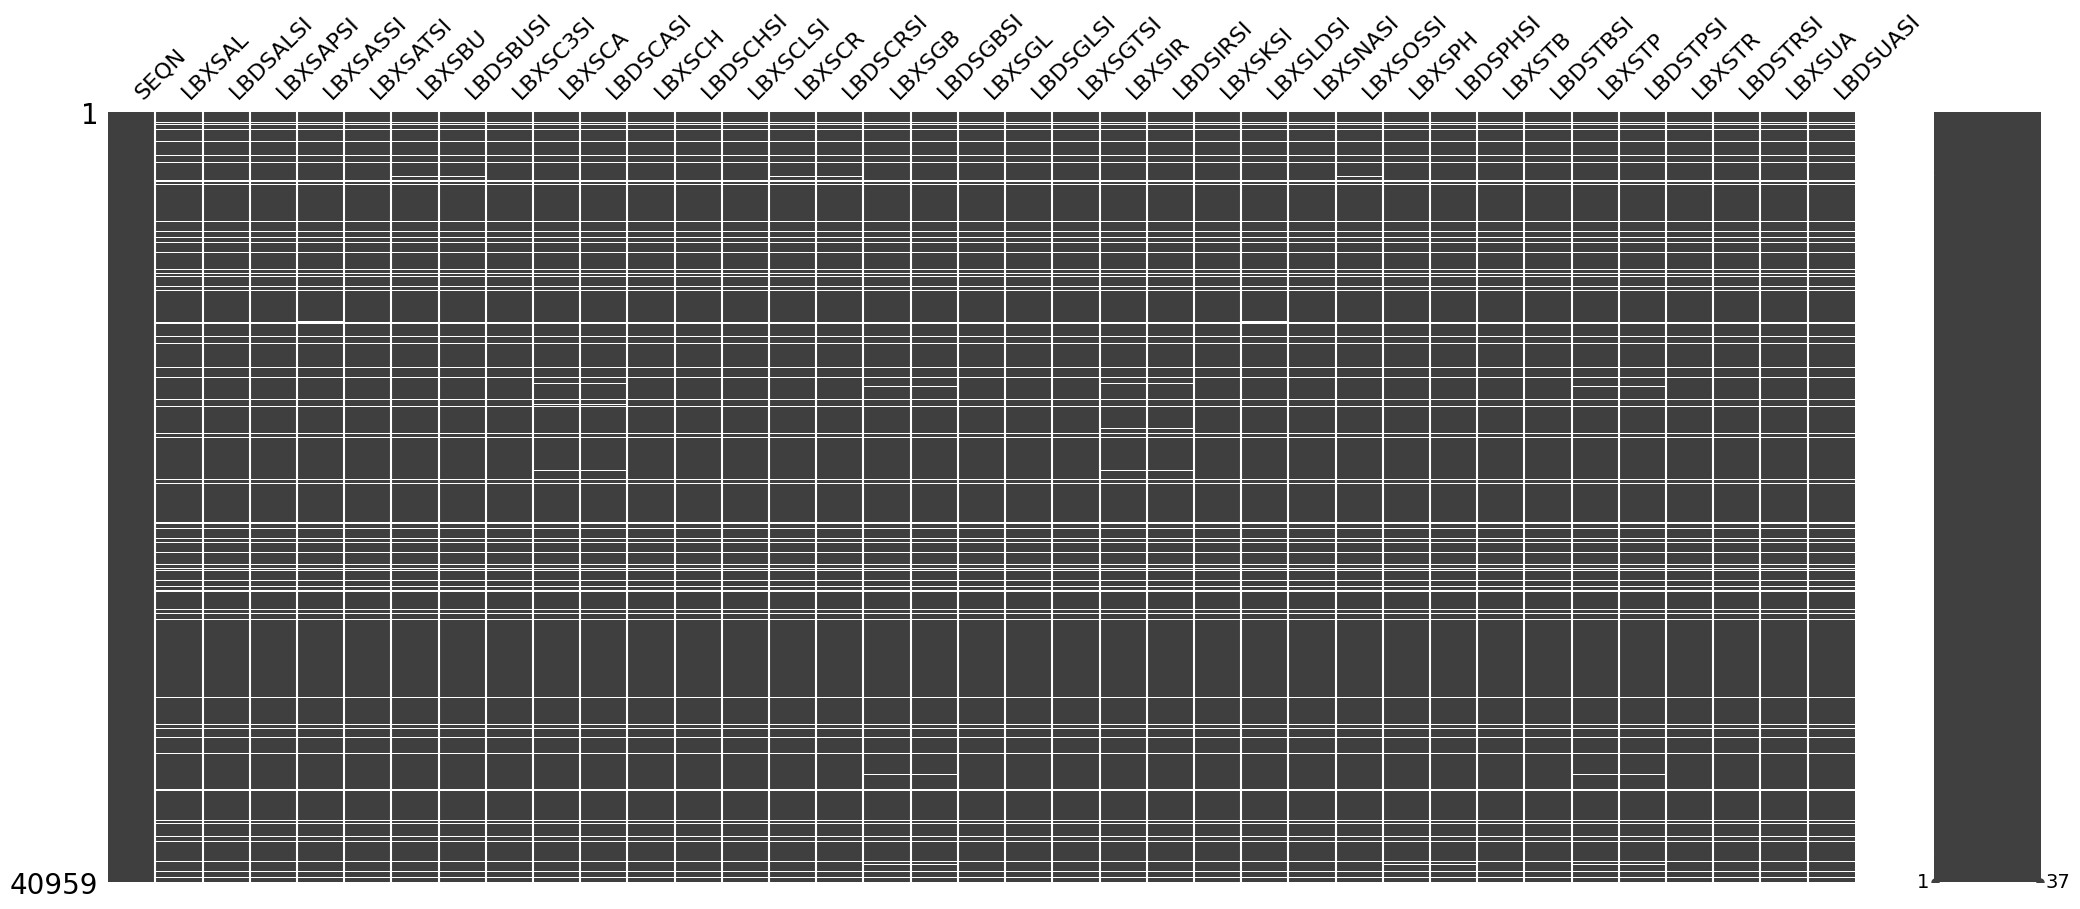

In [50]:
msno.matrix(biopro)

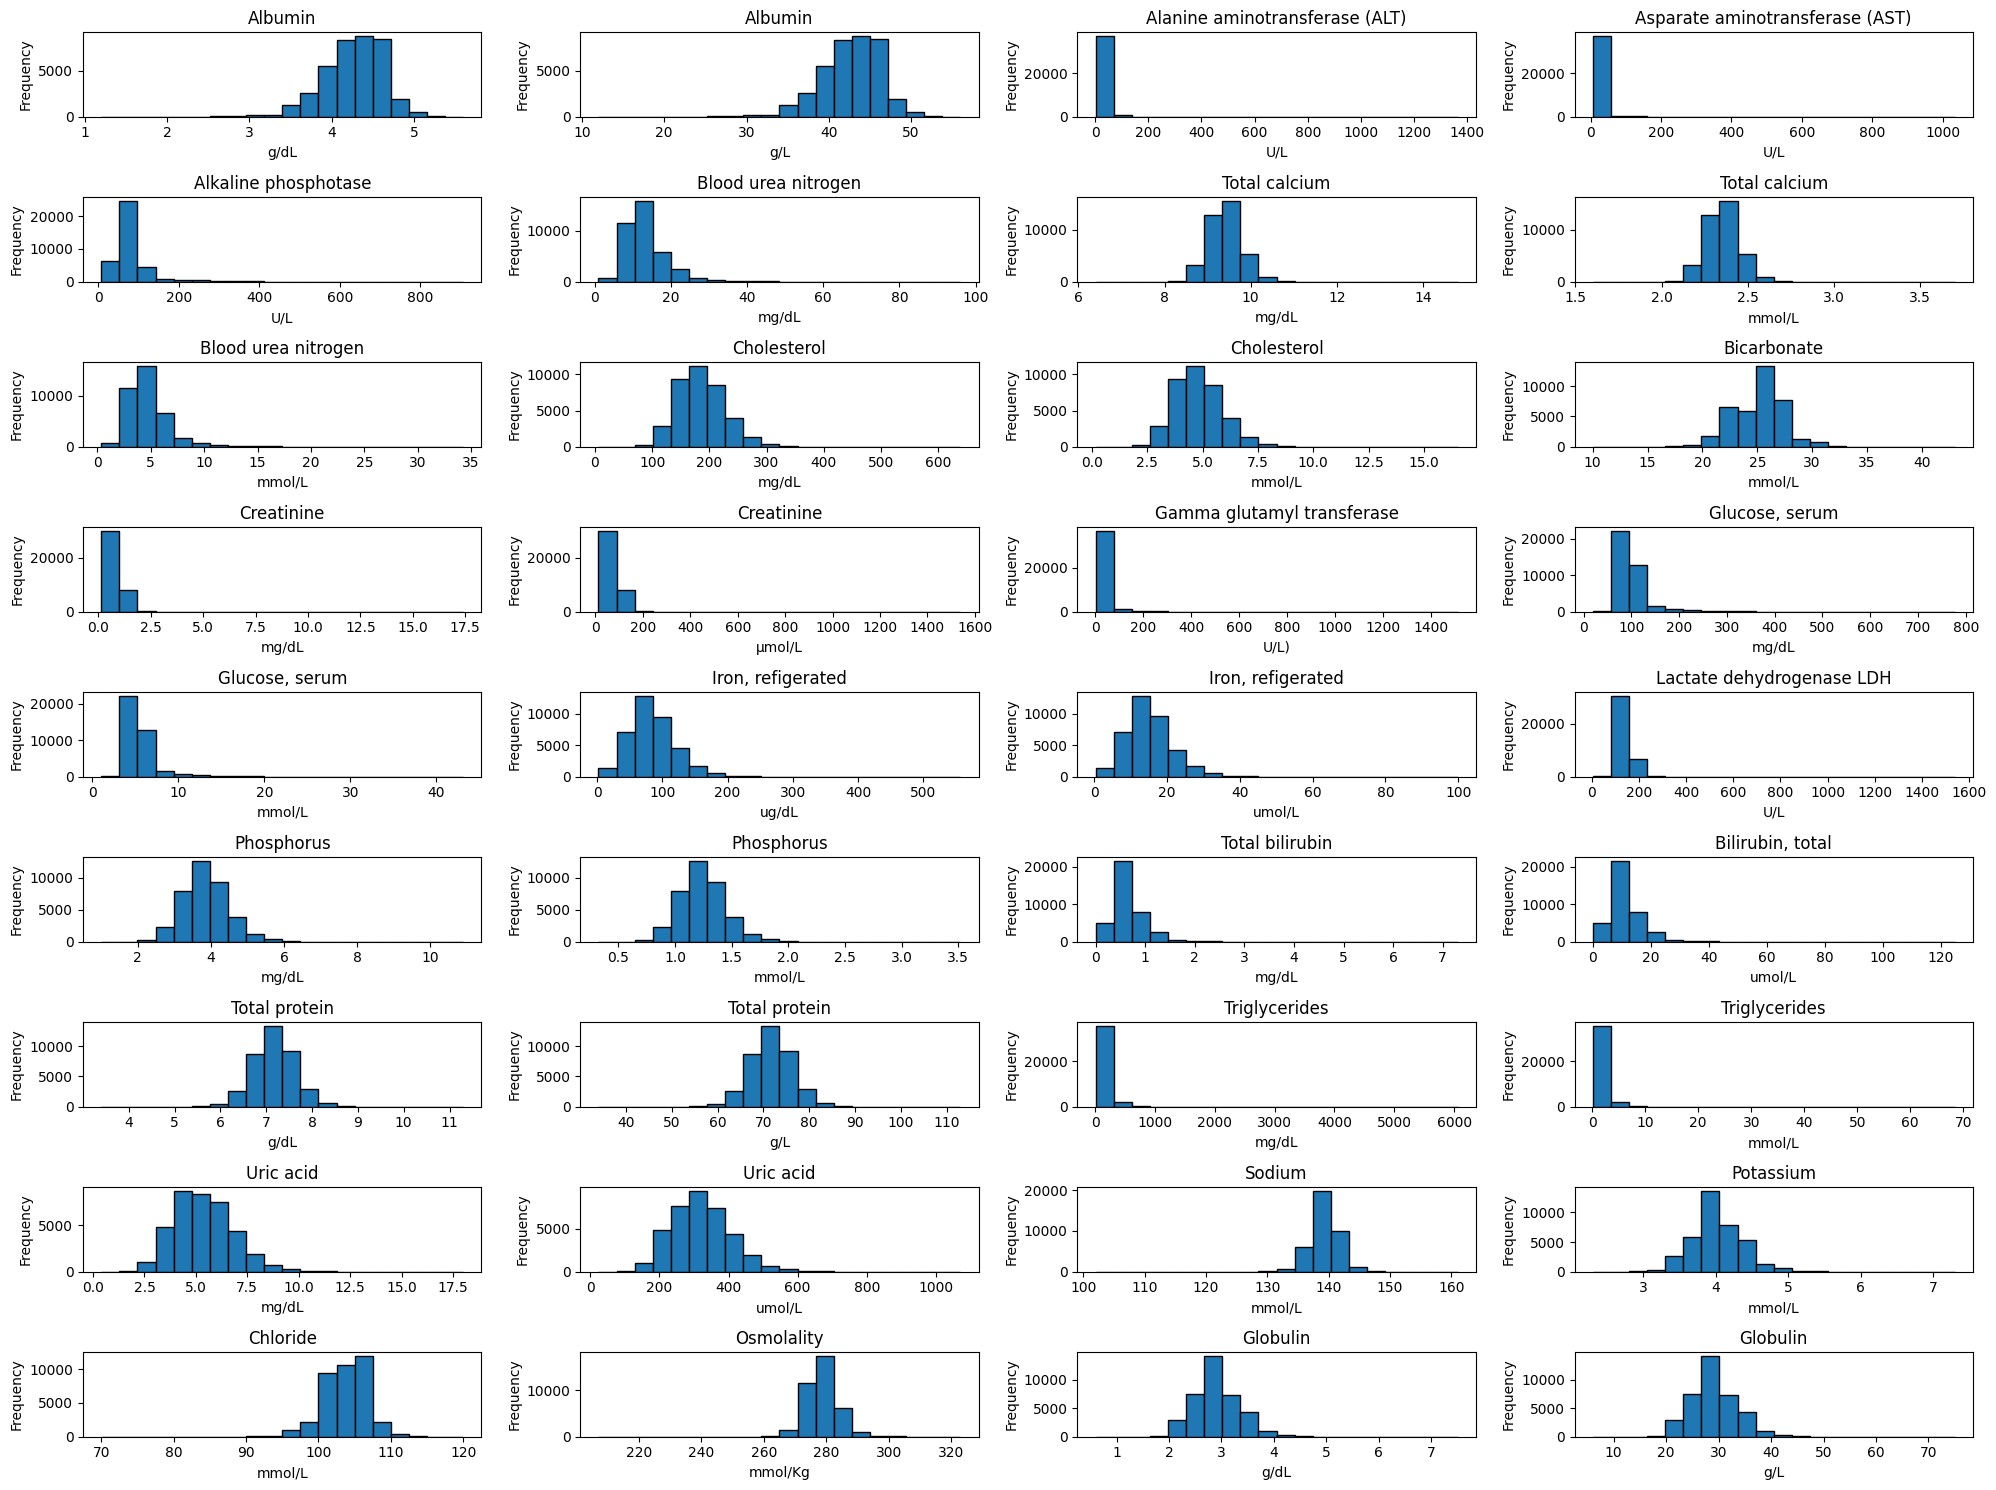

In [51]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---

# Consolidate

<Axes: >

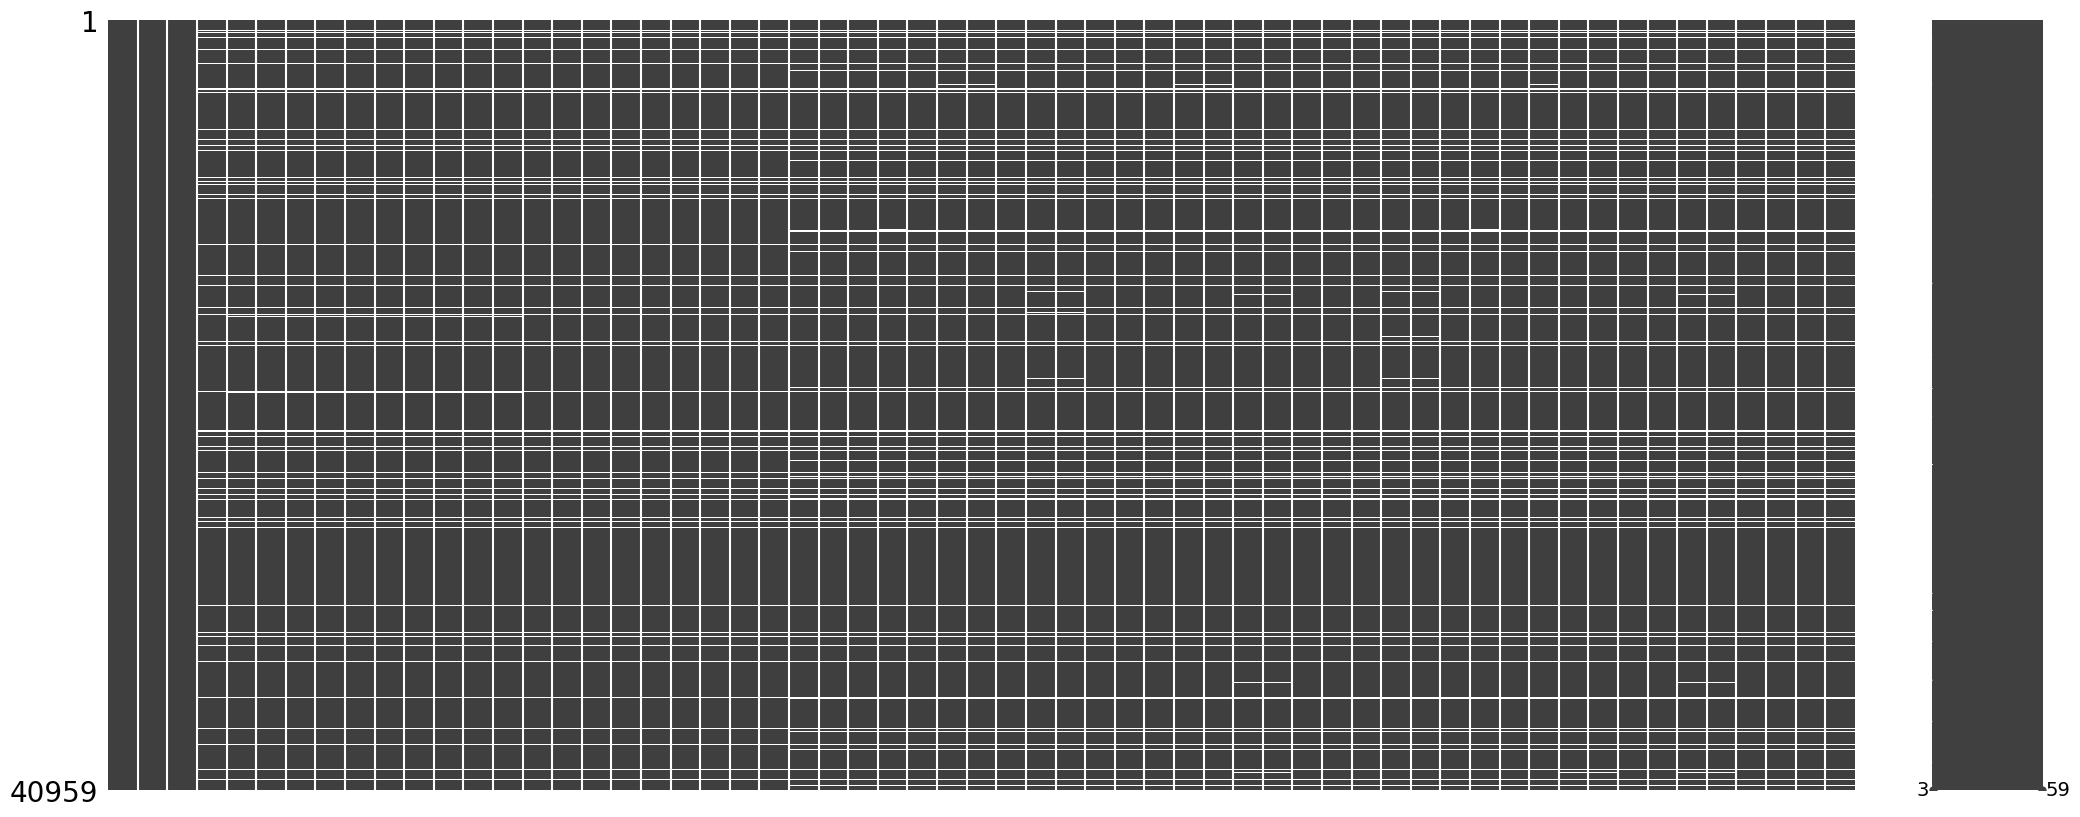

In [58]:
complete = concat("DEMO").loc[:,["SEQN","RIAGENDR","RIDAGEYR"]].round(0)
complete = complete.merge(cbc,how='inner',on='SEQN')
complete = complete.merge(biopro,how='inner',on='SEQN')
complete.drop_duplicates(inplace=True,ignore_index=True)
msno.matrix(complete)

<Axes: >

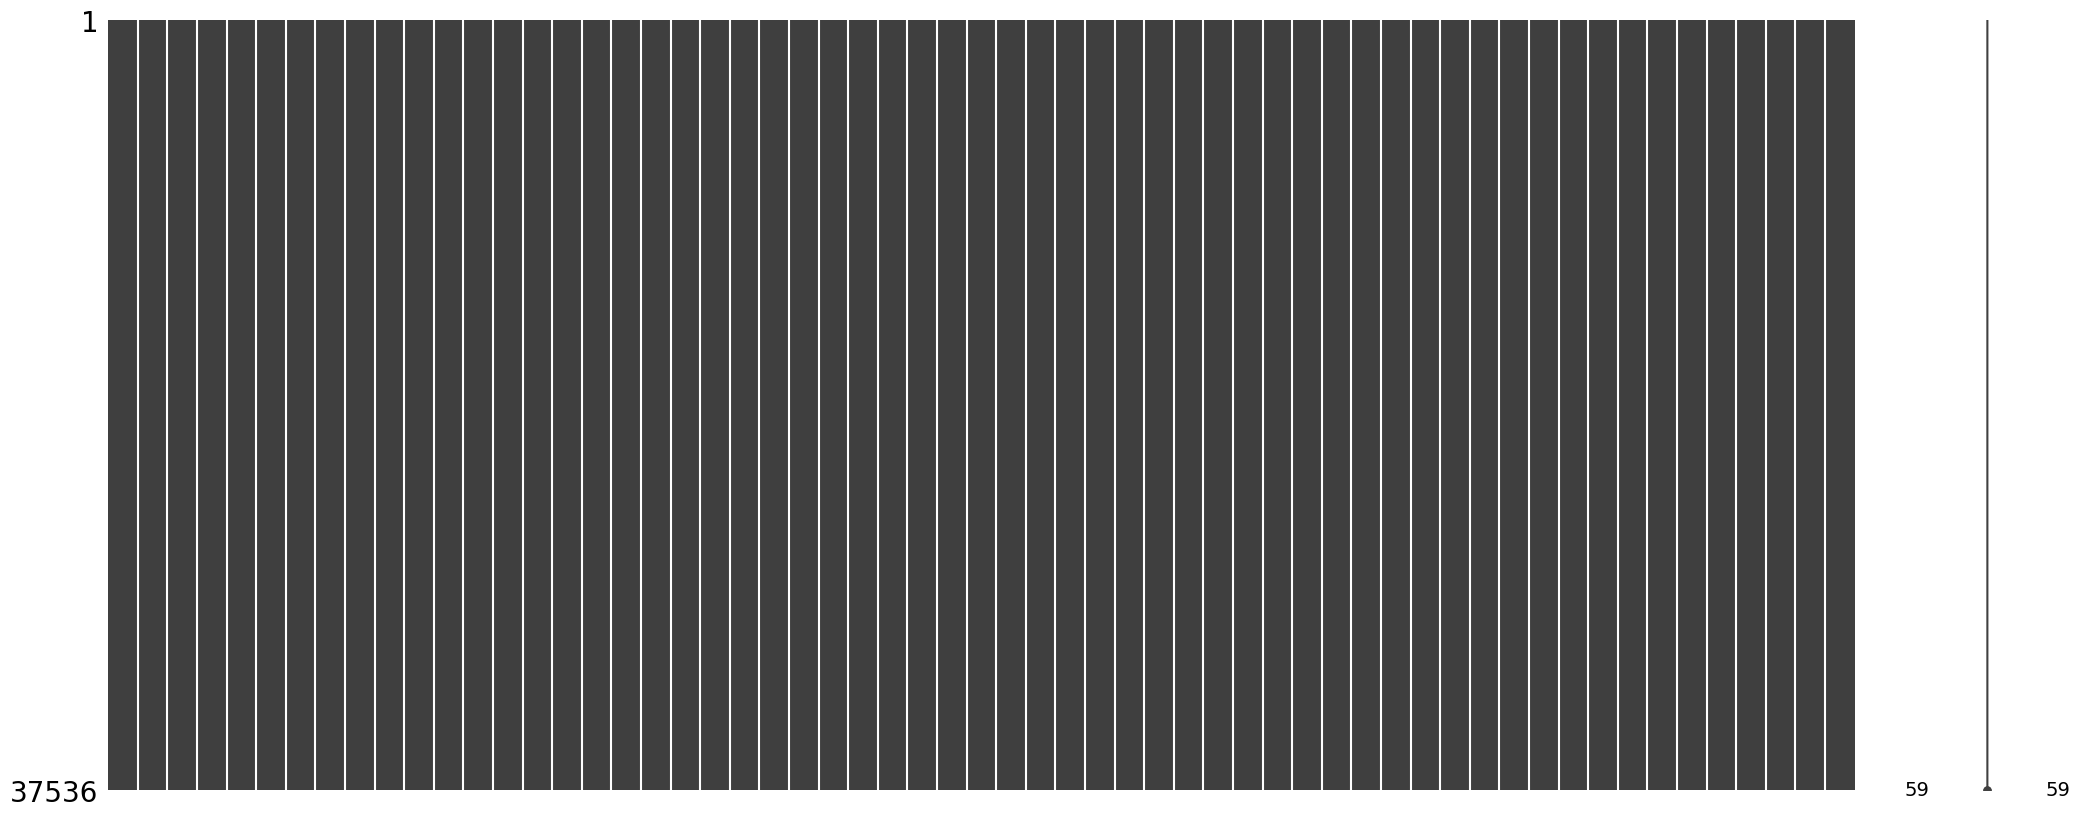

In [60]:
clean = complete.copy().dropna()
msno.matrix(clean)